# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy as np
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

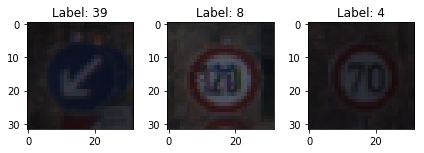

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
%matplotlib inline
# Randomly choose indices to represent which datapoints we choose from the training set
num_images = 3
indices = np.random.choice(list(range(n_train)), size=num_images, replace=False)

# Obtain the images and labels
images = X_train[indices]
labels = y_train[indices]

# Display the images
for i, image in enumerate(images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(image)
    plt.title('Label: %d' % labels[i])
    
plt.tight_layout()
plt.show()


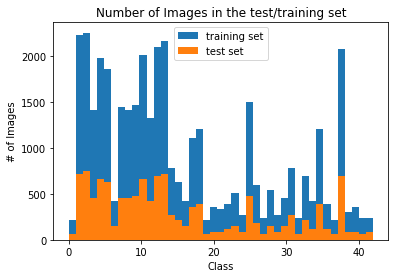

In [4]:
#Show a historgram of the number of images within each class for the training set
plt.hist(y_train, bins=n_classes, label='training set')

#Histogram showing the number of images within each class for the test set
plt.hist(y_test, bins=n_classes, label='test set')


plt.title('Number of Images in the test/training set')
plt.legend(loc='upper center')
plt.ylabel('# of Images')
plt.xlabel('Class')

plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)¶

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
#shuffling the data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [6]:
# Now we want to Normalize the input
X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))


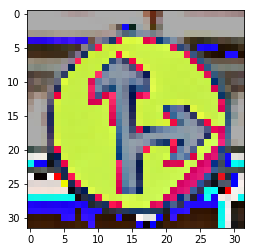

In [7]:
#Plotting a Normalized Image
plt.imshow(X_train[np.random.randint(0, high=39209)])
plt.show()

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
* My line of reasoning for not grayscaling the data was that colours in the picture would potentially help the CNN to classify images that it hasn't seen before.
* I also shuffled the data to decrease the chances of there being patterns in the ordering of the data.
* I normalized the data so that all the input variables have the same treatment and are not scaled with respect to the units of the inputs.

In [8]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
* The training set and the test set were already seperated into different files (train.p, test.p)
* I wanted to be able to play around with parameters in the CNN, and test it, without having my CNN "see" the test data.  I split the training data into a training set (80% of training data) and a validation set (20% of training data).  
* I think an improvement that could be made to preprocessing the data would be to generate more data for each picture.  We could generate more data for each picture by slightly skewing, stretching, compressing, flipping, rotating... etc, the data so the CNN has more images to train on.  As well, we could flip and rotate the images such that whichever images get rotated, then that image might now be able to be labeled under a different class.  This I think would help improve the accuracy of the CNN.  


### Model Architecture ###

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 100
BATCH_SIZE = 128

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    #Dropout
    fc2_drop = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2_drop, fc3_W) + fc3_b
    
    return logits

In [10]:
#x is a placeholder for a batch of input images, y is a placeholder for a batch of output labels

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Training Model ###

In [11]:
#training pipeline

rate = 0.0001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
#Evaluate model on loss and accuracy of the dataset 

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [13]:
#Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.123

EPOCH 2 ...
Validation Accuracy = 0.242

EPOCH 3 ...
Validation Accuracy = 0.325

EPOCH 4 ...
Validation Accuracy = 0.396

EPOCH 5 ...
Validation Accuracy = 0.450

EPOCH 6 ...
Validation Accuracy = 0.495

EPOCH 7 ...
Validation Accuracy = 0.541

EPOCH 8 ...
Validation Accuracy = 0.576

EPOCH 9 ...
Validation Accuracy = 0.621

EPOCH 10 ...
Validation Accuracy = 0.647

EPOCH 11 ...
Validation Accuracy = 0.666

EPOCH 12 ...
Validation Accuracy = 0.691

EPOCH 13 ...
Validation Accuracy = 0.718

EPOCH 14 ...
Validation Accuracy = 0.730

EPOCH 15 ...
Validation Accuracy = 0.742

EPOCH 16 ...
Validation Accuracy = 0.769

EPOCH 17 ...
Validation Accuracy = 0.776

EPOCH 18 ...
Validation Accuracy = 0.793

EPOCH 19 ...
Validation Accuracy = 0.805

EPOCH 20 ...
Validation Accuracy = 0.808

EPOCH 21 ...
Validation Accuracy = 0.827

EPOCH 22 ...
Validation Accuracy = 0.823

EPOCH 23 ...
Validation Accuracy = 0.834

EPOCH 24 ...
Validation Accura

### Evaluate the Model on test data ###

In [14]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.884


## Results ##

- Validation Accuracy = 95.7%
- Test Accuracy = 88.4%

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
* The final architecture of the CNN is as follows 

##### Convolutional Layer 1  ####
    - Input = 32x32x3, Output = 28x28x6
    - Stride = 1
    - Patch Size = 5x5
    - VALID padding

- ReLu Activation
- Pooling (Input = 28x28x6. Output = 14x14x6)

##### Convolutional Layer 2  ####
    - Input = 14x14x6, Output = 10x10x16
    - Stride = 1
    - Patch Size = 5x5
    - VALID padding

- ReLu Activation
- Pooling (Input = 10x10x16. Output = 5x5x16)
- Flattening (Input = 5x5x16. Output = 400)

##### Fully Connected Layer 3  ####
    - Input = 400, Output = 120

- ReLu Activation

##### Fully Connected Layer 4  ####
    - Input = 120, Output = 84

- ReLu Activation
- Dropout (keep 50%)

##### Fully Connected Layer 5  ####
    - Input = 84, Output = 43
   


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
- Type of optimizer: AdamOptimizer
- Batch Size = 128
- Number of Epochs = 100
- Dropout: 0.5
- learning rate = 0.0001


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
- I had decided to try and go with the LeNet-5 architecture for this problem.  I tried implementing the CNN architecture that Google had come up with, Inception v3, but due to time constraints and the complexity of the inception layers, I decided to keep it more simple with the LeNet-5 architecture. 
- I placed the Dropout in different areas of the CNN, but noticed that placing it right before the readout layer gave the best results. 
- I tried varying epoch numbers.  I settled on 100 because after 100, the accuracy of the model did not seem to get any better.  
- I also tried different batch sizes, but settled on 128 because that gave the best results with this implementation.
- I also experimented with different learning rates.  I attempted slightly bigger learning rates for the same number of epochs, but found that the accuracy plateaued more quickly.  I found this learning rate to give a good balance of accuracy and time to train.
- Lastly, as I stated above, the accuracy may have been better if I generated more data by manipulating the images, to give a more diversified set of images for each class.  I will try and implement this in the future when I come back to this problem and have more time.  

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
slippery_road = cv2.imread('GermanSigns/slipper_road.png')
keep_left = cv2.imread('GermanSigns/keep_left.png')
no_entry = cv2.imread('GermanSigns/no_entry.png')
stop_bumpy = cv2.imread('GermanSigns/stop_bumpy.png')
traffic_lights = cv2.imread('GermanSigns/traffic_lights.png')

Image shape:  (720, 960, 3)


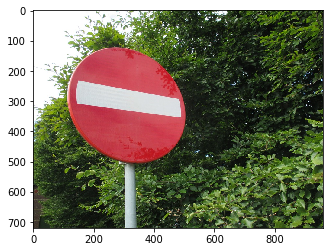

In [18]:
print("Image shape: ", no_entry.shape)
plt.imshow(cv2.cvtColor(no_entry, cv2.COLOR_BGR2RGB))

Image shape:  (360, 640, 3)


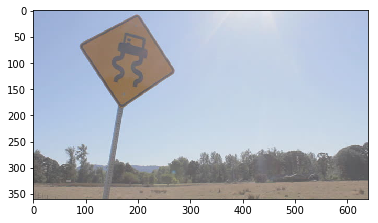

In [19]:
print("Image shape: ", slippery_road.shape)
plt.imshow(cv2.cvtColor(slippery_road, cv2.COLOR_BGR2RGB))

Image shape:  (196, 257, 3)


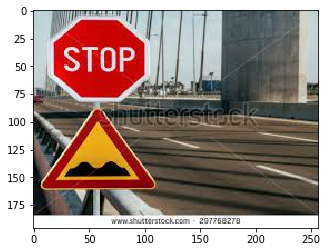

In [20]:
print("Image shape: ", stop_bumpy.shape)
plt.imshow(cv2.cvtColor(stop_bumpy, cv2.COLOR_BGR2RGB))

Image shape:  (198, 298, 3)


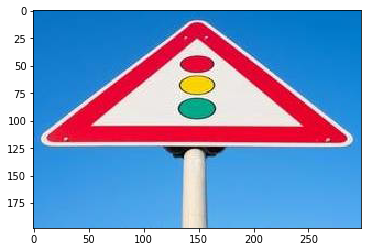

In [21]:
print("Image shape: ", traffic_lights.shape)
plt.imshow(cv2.cvtColor(traffic_lights, cv2.COLOR_BGR2RGB))

Image shape:  (600, 400, 3)


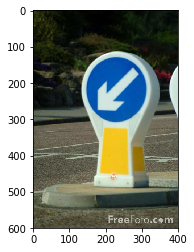

In [22]:
print("Image shape: ", keep_left.shape)
plt.imshow(cv2.cvtColor(keep_left, cv2.COLOR_BGR2RGB))

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
- (NO ENTRY) For the first image, the CNN should make the right prediction, although because there is alot of green in the background, this might throw it off.  
- (SLIPPERY ROAD) This image may be difficult to classify because of the sunlight coming in at the top of the picture. 
- (STOP/BUMPY) This image I chose because I wanted to know how the CNN would handle both signs.  
- (TRAFFIC LIGHTS) I think this image should be classified fairly easily
- (KEEP LEFT) I don't think there would be too many issues with this image.

In [25]:
slippery_road32 = cv2.imread('GermanSigns/slipper_road32.png')
keep_left32 = cv2.imread('GermanSigns/keep_left32.png')
no_entry32 = cv2.imread('GermanSigns/no_entry32.png')
stop_bumpy32 = cv2.imread('GermanSigns/stop_bumpy32.png')
traffic_lights32 = cv2.imread('GermanSigns/traffic_lights32.png')

keep_left_new = cv2.cvtColor(keep_left32, cv2.COLOR_BGR2RGB)
slippery_road_new = cv2.cvtColor(slippery_road32, cv2.COLOR_BGR2RGB)
no_entry_new = cv2.cvtColor(no_entry32, cv2.COLOR_BGR2RGB)
stop_bumpy_new = cv2.cvtColor(stop_bumpy32, cv2.COLOR_BGR2RGB)
traffic_lights_new = cv2.cvtColor(traffic_lights32, cv2.COLOR_BGR2RGB)



new_images = [slippery_road_new, keep_left_new, no_entry_new, stop_bumpy_new, traffic_lights_new]
new_images = np.asarray(new_images)
new_images = (new_images - new_images.mean()) / (np.max(new_images) - np.min(new_images))
my_labels = [23, 39, 17, 14, 26]

In [26]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    new_saver = tf.train.import_meta_graph('./lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(new_images, my_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.200


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
- Based on the accuracy, my model predicted one correct outcome.  This clearly indicates that it isn't good at classifying signs from an outside source, compared to the validation and test set which had an accuracy of 95.7 and 88.4 respectively.

In [32]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: new_images, keep_prob: 1.0})
    Top_k = sess.run(top_k, feed_dict={x: new_images, keep_prob: 1.0})
    print(Top_k)

TopKV2(values=array([[  6.09045088e-01,   2.87237585e-01,   8.87733400e-02],
       [  9.98364866e-01,   1.12439925e-03,   4.78280941e-04],
       [  6.85280025e-01,   2.85260886e-01,   2.92585269e-02],
       [  9.52793479e-01,   2.77928319e-02,   1.48686543e-02],
       [  1.00000000e+00,   4.36315206e-10,   2.79428061e-11]], dtype=float32), indices=array([[18, 24, 26],
       [36, 13, 38],
       [17, 14, 10],
       [12, 25, 29],
       [12,  9, 10]], dtype=int32))


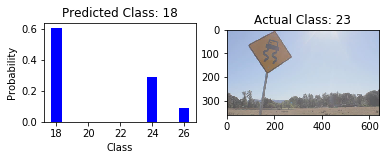

In [77]:
fig = plt.figure()

fig.add_subplot(221)
y = Top_k[0][0]
x = [18,24,26]
width = 1/1.5
plt.ylabel('Probability')
plt.xlabel('Class')
plt.title('Predicted Class: 18')
plt.bar(x, y, width, color="blue")

fig.add_subplot(222)
plt.imshow(cv2.cvtColor(slippery_road, cv2.COLOR_BGR2RGB))
plt.title('Actual Class: 23')

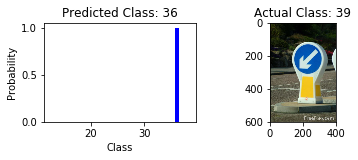

In [78]:
fig = plt.figure()

fig.add_subplot(221)
y = Top_k[0][1]
x = [36, 13, 38]
width = 1/1.5
plt.ylabel('Probability')
plt.xlabel('Class')
plt.title('Predicted Class: 36')
plt.bar(x, y, width, color="blue")

fig.add_subplot(222)
plt.imshow(cv2.cvtColor(keep_left, cv2.COLOR_BGR2RGB))
plt.title('Actual Class: 39')


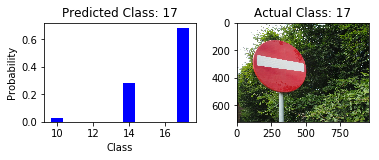

In [79]:
fig = plt.figure()

fig.add_subplot(221)
y = Top_k[0][2]
x = [17, 14, 10]
width = 1/1.5
plt.ylabel('Probability')
plt.xlabel('Class')
plt.title('Predicted Class: 17')
plt.bar(x, y, width, color="blue")

fig.add_subplot(222)
plt.imshow(cv2.cvtColor(no_entry, cv2.COLOR_BGR2RGB))
plt.title('Actual Class: 17')


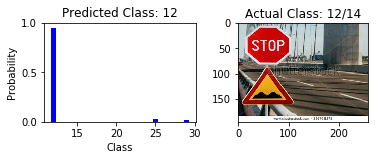

In [83]:
fig = plt.figure()

fig.add_subplot(221)
y = Top_k[0][3]
x = [12, 25, 29]
width = 1/1.5
plt.ylabel('Probability')
plt.xlabel('Class')
plt.title('Predicted Class: 12')
plt.bar(x, y, width, color="blue")

fig.add_subplot(222)
plt.imshow(cv2.cvtColor(stop_bumpy, cv2.COLOR_BGR2RGB))
plt.title('Actual Class: 12/14')

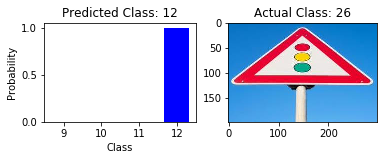

In [82]:
fig = plt.figure()

fig.add_subplot(221)
y = Top_k[0][4]
x = [12,  9, 10]
width = 1/1.5
plt.ylabel('Probability')
plt.xlabel('Class')
plt.title('Predicted Class: 12')
plt.bar(x, y, width, color="blue")

fig.add_subplot(222)
plt.imshow(cv2.cvtColor(traffic_lights, cv2.COLOR_BGR2RGB))
plt.title('Actual Class: 26')

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*



**Answer:**
- The model showed a certainty of essentially 100% for the traffic lights picture.  It guessed that it was a stop sign, which maybe the angle that the picture was taken made it difficult for the CNN to predict.

- Another interesting case was the stop-sign/bumpy road sticker.  The CNN actually predicted that it was a stop sign, which is obviously partially right.  I think that the CNN predicted the stop sign over the bumpy road sign because the stop sign had a fair amount of training data and also, it has very destinct features over any other sign.   

- The No Entry picture was the only one that the CNN predicted correctly.  I believe this was the case because the sign itself is very "basic" from a feature standpoint, allowing the CNN to have a better chance at predicting the correct answer.

- For all of the predictions that the CNN made, except for the "No Entry" picture (where it guessed right), it completely got it wrong.  There wasn't any of the right answers in the top 3 predictions.  This leads me to believe that a couple of things can be improved.  Of course the CNN itself can be improved by tweaking the hyperparameters, one could also add some more convolutional layers or fully connected layers etc.  Although I think that what would make the CNN come away with the best results is more data.  If there was more data in the training set, I think that would help.  Also as stated earlier, I believe that if there were some data augmentation applied to the data set, then that could have given the CNN a better shot at performing on signs from the internet or pictures that one would take itself.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

This project was challenging, but enjoyable as well